<a href="https://colab.research.google.com/github/Durgateja25/Data-Analytics/blob/main/EDAcasestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis Case Study

###Case study - EDA for Insurance Data

In [ ]:
%matplotlib inline

###Download the Insurance Dataset

In [ ]:
!curl -o insurance.csv https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv insurance.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54288  100 54288    0     0   168k      0 --:--:-- --:--:-- --:--:--  168k
curl: (6) Could not resolve host: insurance.csv


###Import all the necessary libraries

In [ ]:
import pandas as pd #FOr working with dataframes
import numpy as np  #The python numerical algebra package
from matplotlib import pyplot as plt #For plotting
import seaborn as sns   # Package for advanced data visualizations
import statsmodels.api as sm #Package for statistical modelling
import scipy.stats as stats  # Another package for statistical modelling
from sklearn.preprocessing import LabelEncoder # Python package for Machine Learning Models
import copy #https://docs.python.org/3/library/copy.html


In [ ]:
sns.set() #Setting the default seaborn style for our plots

###Read the data into the book

In [ ]:
df = pd.read_csv('insurance.csv') #read the data as a data frame

In [ ]:
df.head()  #Checking the head of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Check for Missing Data

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


####We have zero missing values.

In [ ]:
df.describe().T  #five point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801



- Data looks legit as all the statistics seems reasonable.
- Looking at the age column, data looks representative of the true age distribution of the adult population.
- Very few people have more than 2 children. 75% of the people have 2 or less children.
- The claimed amount is highly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.




###Investigate the different Variables

In [ ]:
df['sex'].value_counts() # NO of males and females in the dataset

,count
sex,
male,676
female,662


In [ ]:
df['children'].value_counts().sort_values() # Distribution of the number of childrenss per person

,count
children,
5,18
4,25
3,157
2,240
1,324
0,574


In [ ]:
df['age'].value_counts().sort_values()  # Age Distribution

,count
age,
64,22
61,23
62,23
63,23
60,23
39,25
35,25
38,25
36,25


##Data Cleaning
Converting categorical features to Numerical

In [ ]:
clean_data = {'sex' : {'male' : 0, 'female' : 1},
              'smoker' : {'no' : 0, 'yes' : 1},
              'region' : {'northwest' : 0, 'northeast' : 1, 'southeast' : 2, 'southwest' : 3}
              }
data_copy = df.copy()
data_copy.replace(clean_data, inplace = True)

In [ ]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


###Pairwise correlation Heatmap

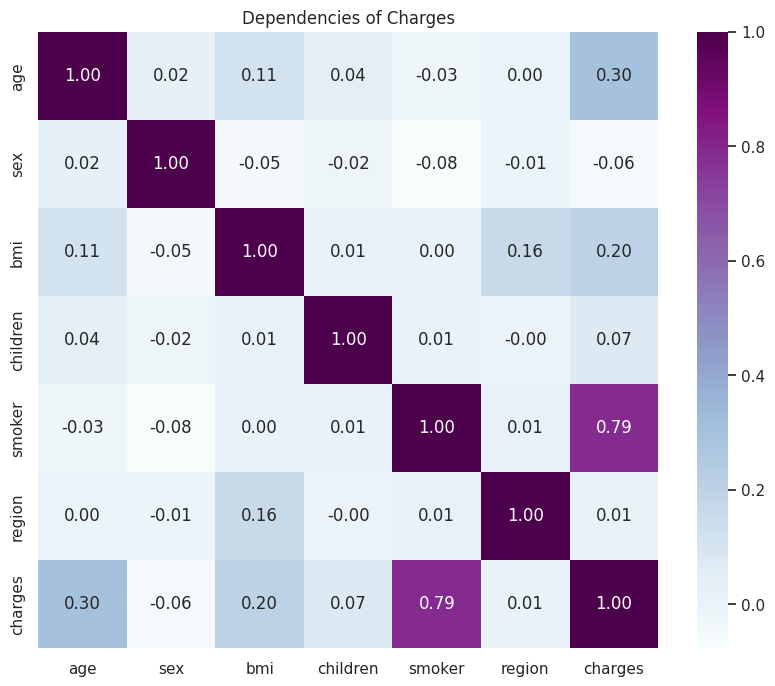

In [ ]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr, cmap = 'BuPu', annot = True, fmt = ".2f",ax = ax)
plt.title("Dependencies of Charges")
plt.show()

**Smoker, BMI and Age are the most important factor that determines - charges**. Sex, Children and Region do not affect the charges. We might drop these thee columns as they have less correlation.

In [ ]:
print(data_copy['sex'].value_counts().sort_values())
print(data_copy['children'].value_counts().sort_values())
print(data_copy['region'].value_counts().sort_values())

sex
1    662
0    676
Name: count, dtype: int64
children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64
region
1    324
3    325
0    325
2    364
Name: count, dtype: int64


First we analyze the distribution of charges.

<ipython-input-16-9e2bcbee377e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

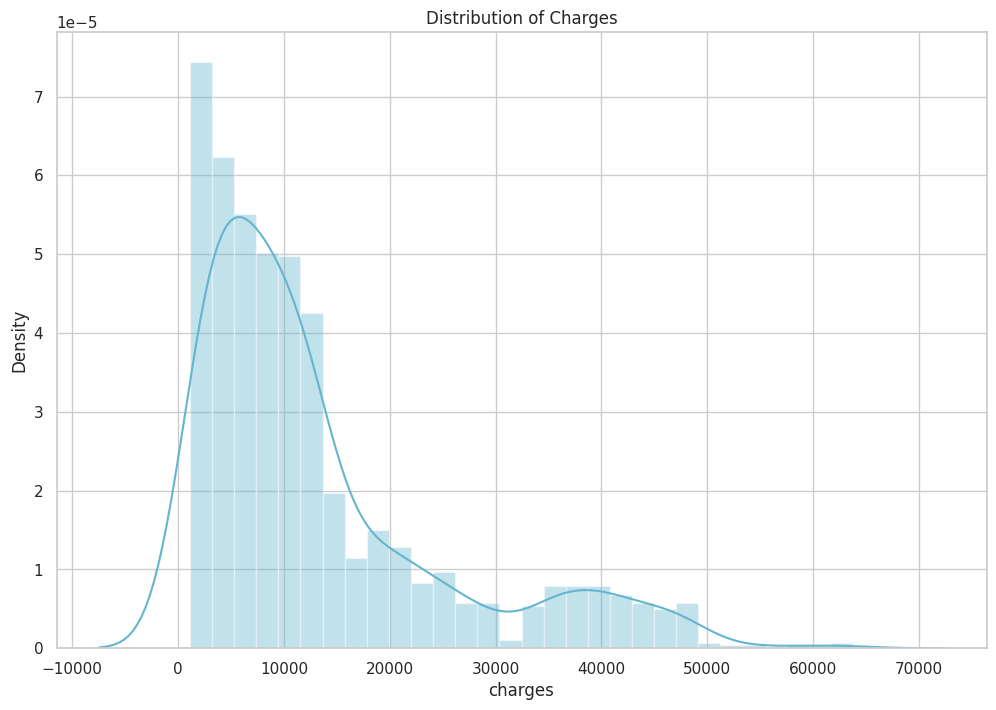

In [ ]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1,1, figsize = (12,8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can log transform the variable.

<ipython-input-17-e581b7976fae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'y', ) # Log with base 10


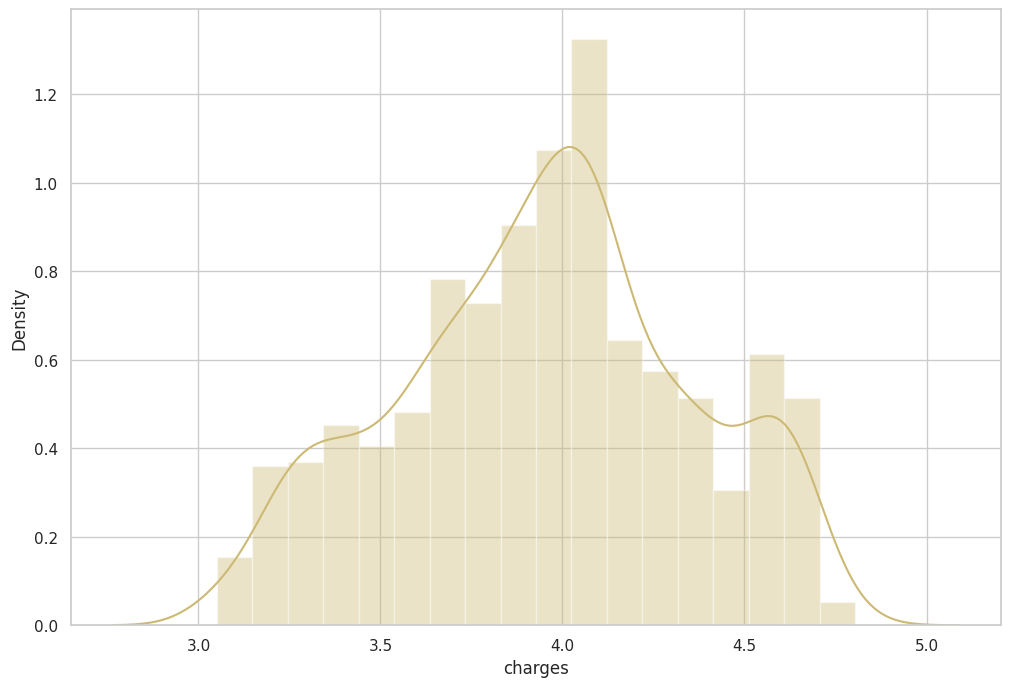

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (12,8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'y', ) # Log with base 10


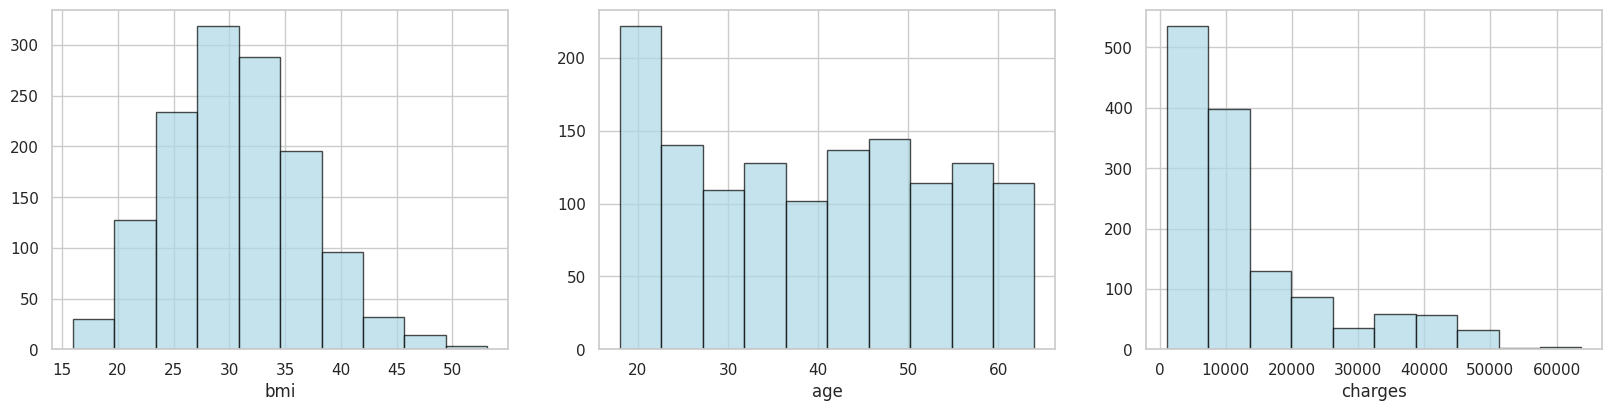

In [ ]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()


**bmi looks quiet normally distributed.**

**Age seems to be distributed quiet normally.**

**As seen in the previous step charges are highly skewed.**

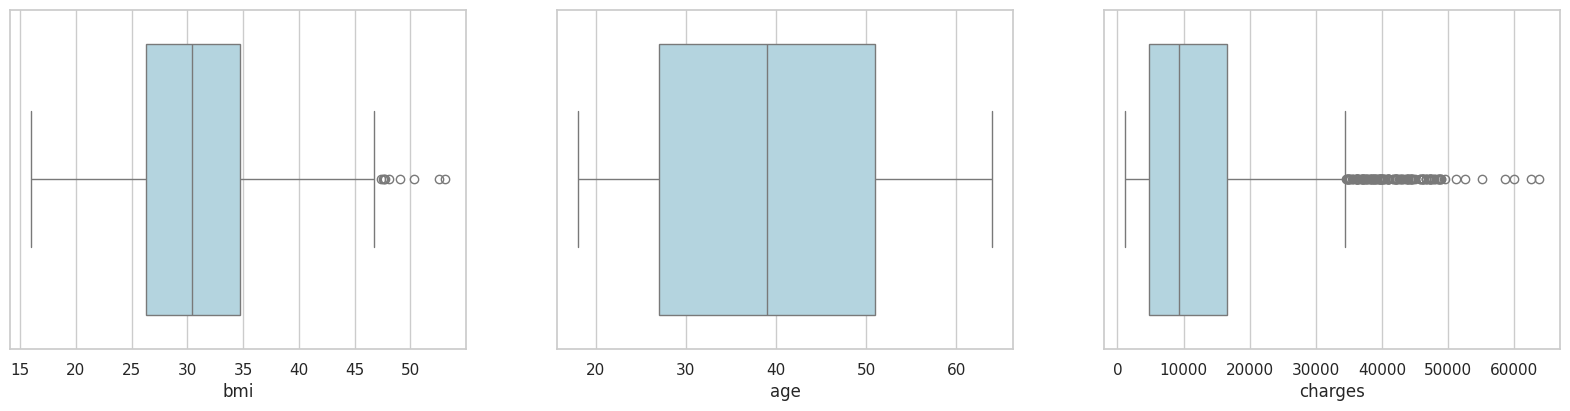

In [ ]:
plt.figure(figsize = (20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x = df.bmi, color = 'lightblue')

plt.subplot(3, 3, 2)
sns.boxplot(x = df.age, color = 'lightblue')

plt.subplot(3, 3, 3)
sns.boxplot(x = df.charges, color = 'lightblue')

plt.show()

- **bmi has a few extreme values** - charges as it is highly skewed, there are quiet a lot of extreme values.

In [ ]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
  print('{0} : Skewness {1:.3f} and kurtosis {2:.3f}'.format(col,data_copy[col].skew(), data_copy[col].kurt()))


Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and kurtosis -1.245
sex : Skewness 0.021 and kurtosis -2.003
bmi : Skewness 0.284 and kurtosis -0.051
children : Skewness 0.938 and kurtosis 0.202
smoker : Skewness 1.465 and kurtosis 0.146
region : Skewness -0.038 and kurtosis -1.329
charges : Skewness 1.516 and kurtosis 1.606


<ipython-input-21-d7e084b5ff29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y = charges.head(),x = charges.head().index, palette = 'Blues')


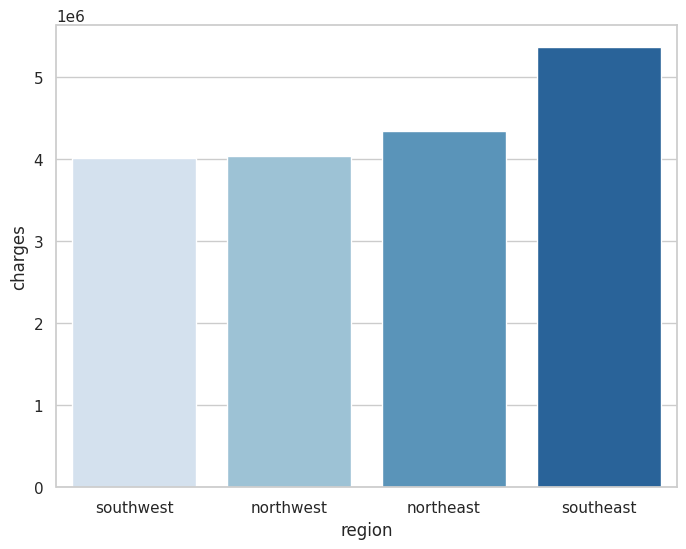

In [ ]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize = (8,6))
ax = sns.barplot(y = charges.head(),x = charges.head().index, palette = 'Blues')

###So, the highest medicl charges are in the southeast region and the lowest are in the southwest region.
Taking into account certain factors with respect to each attributes.

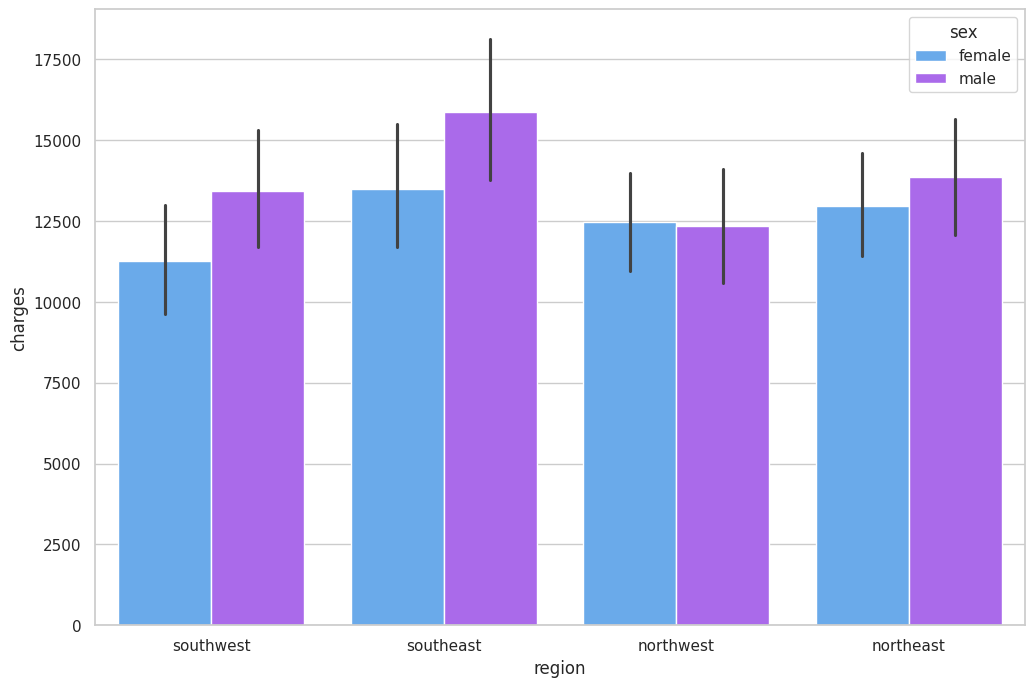

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'cool')


Taking into account certain factors (smoking, charges)

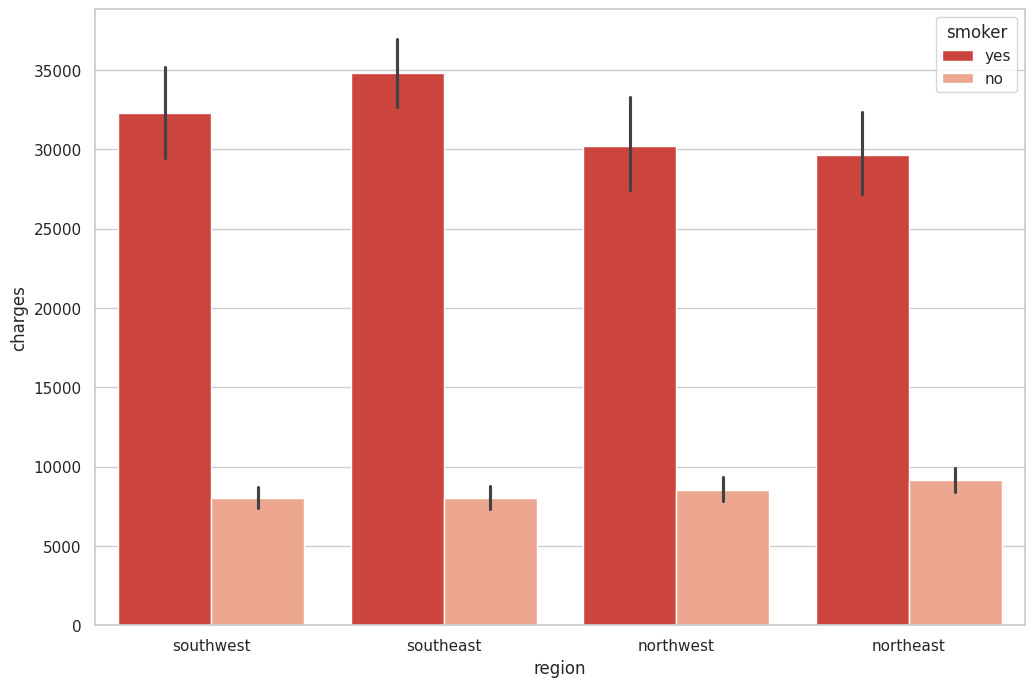

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns. barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')

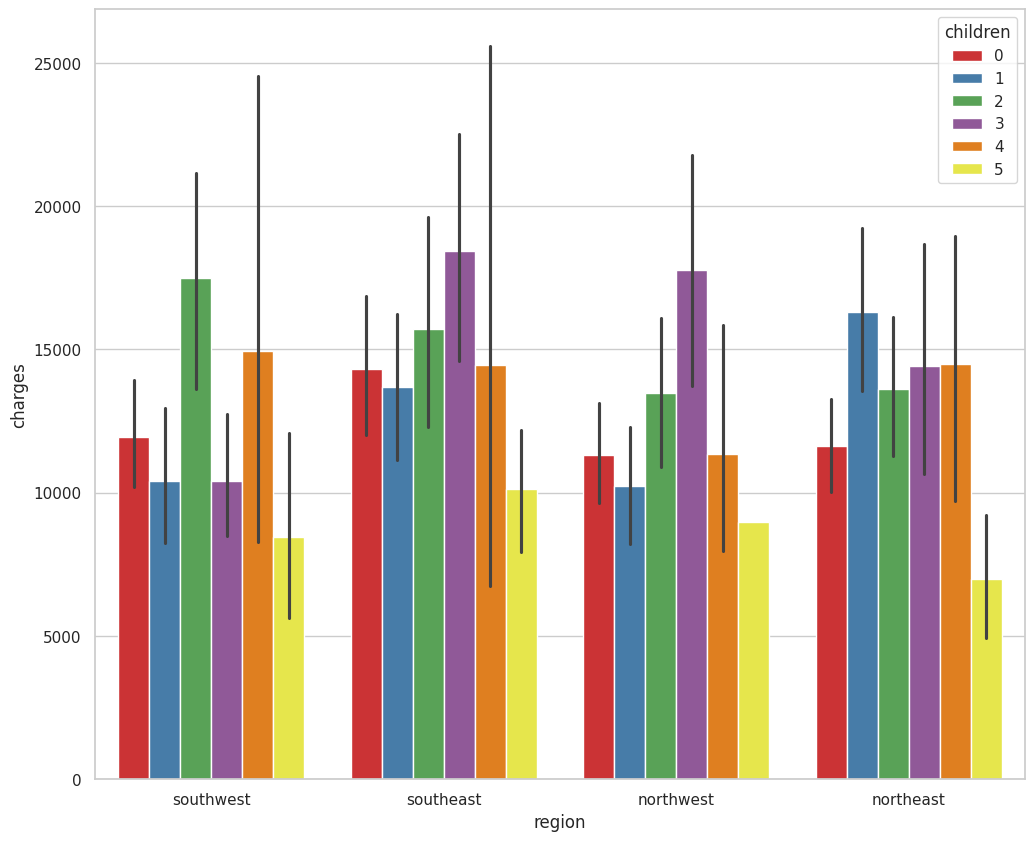

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (12, 10))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df, palette = 'Set1')


As we can see from these barplots the highest charges are due to smoking are still in the southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.


###Age vs Charges
The more the age the more will be the insurance charge

Text(0.5, 1.0, 'Age vs Charges')

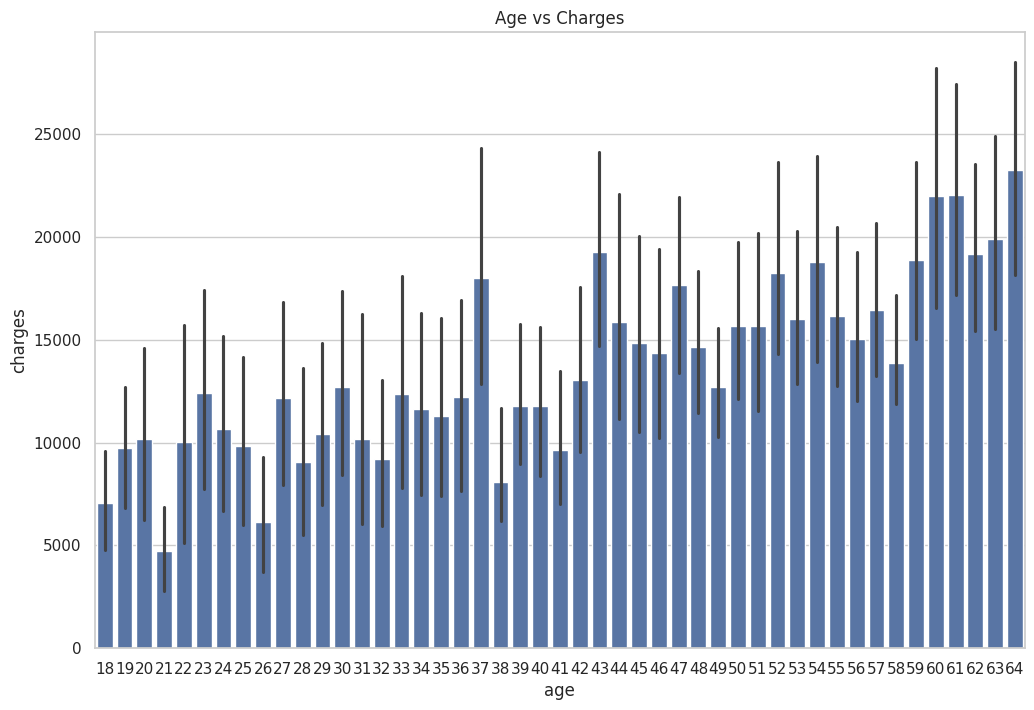

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = df)

plt.title('Age vs Charges')

###Sex vs Charges
Males have slightly greater insurance charges than females in general.

<ipython-input-26-b99f54743a0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'sex', y = 'charges', data = df, palette = 'hot')


Text(0.5, 1.0, 'Sex vs Charges')

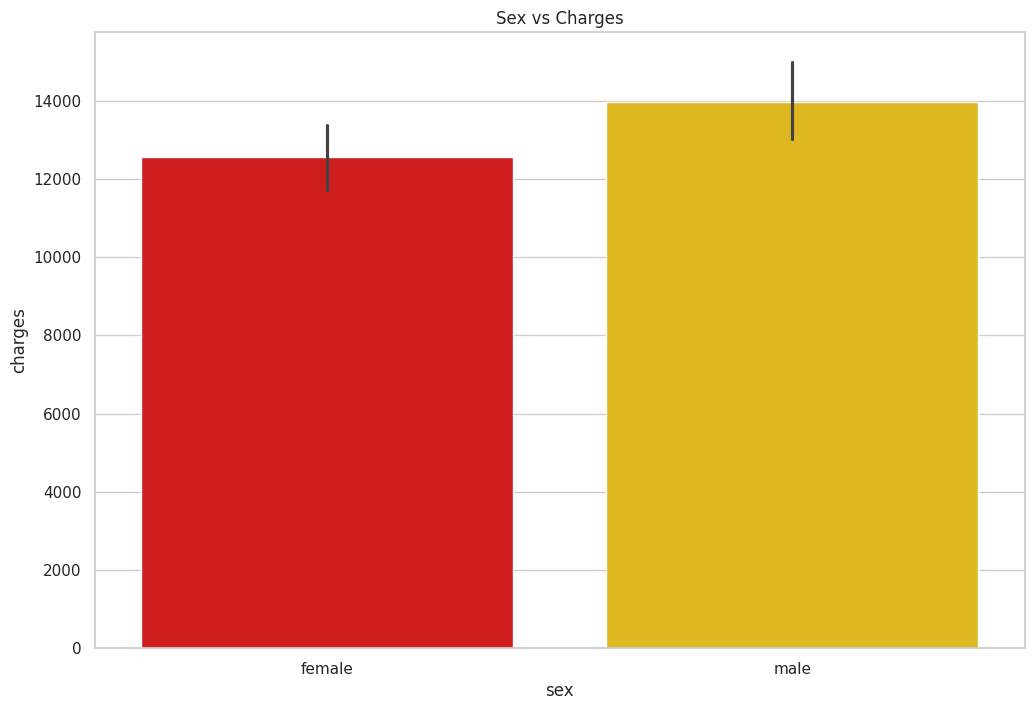

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'sex', y = 'charges', data = df, palette = 'hot')
plt.title('Sex vs Charges')

###Smoker vs Charges
Smokers have more insurance charges than the non-smokers.

<ipython-input-27-a1c7f5697bbf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'smoker', y = 'charges', data = df, palette = 'cool')


Text(0.5, 1.0, 'Smoker Vs Charges')

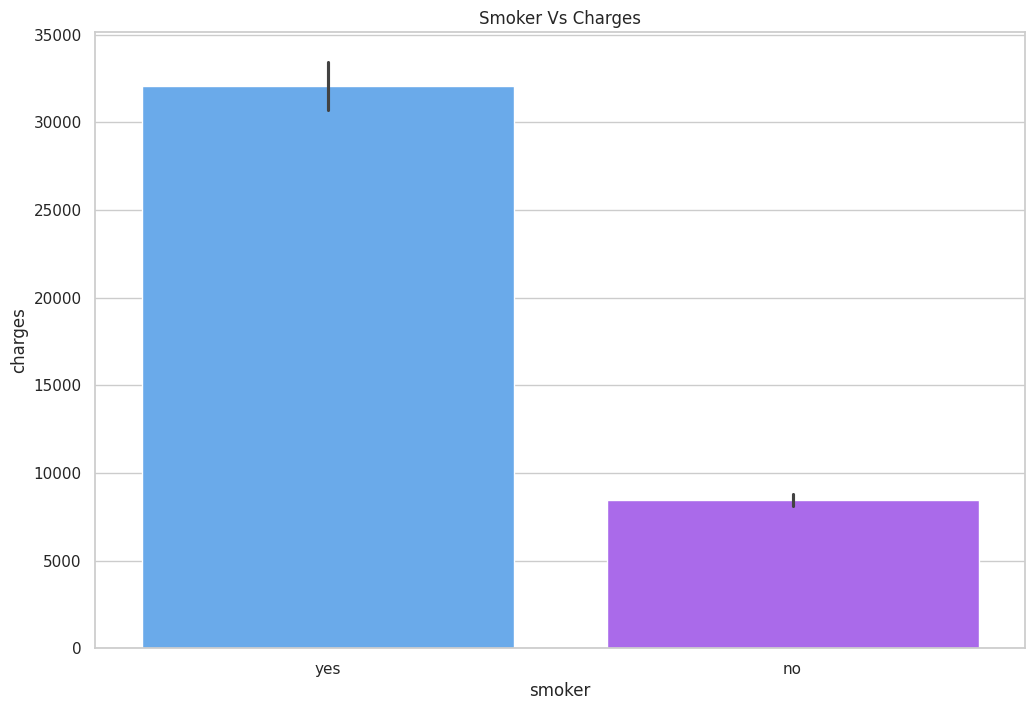

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'smoker', y = 'charges', data = df, palette = 'cool')
plt.title('Smoker Vs Charges')

###BMI vs Charges

Text(0.5, 1.0, 'BMI vs Charges')

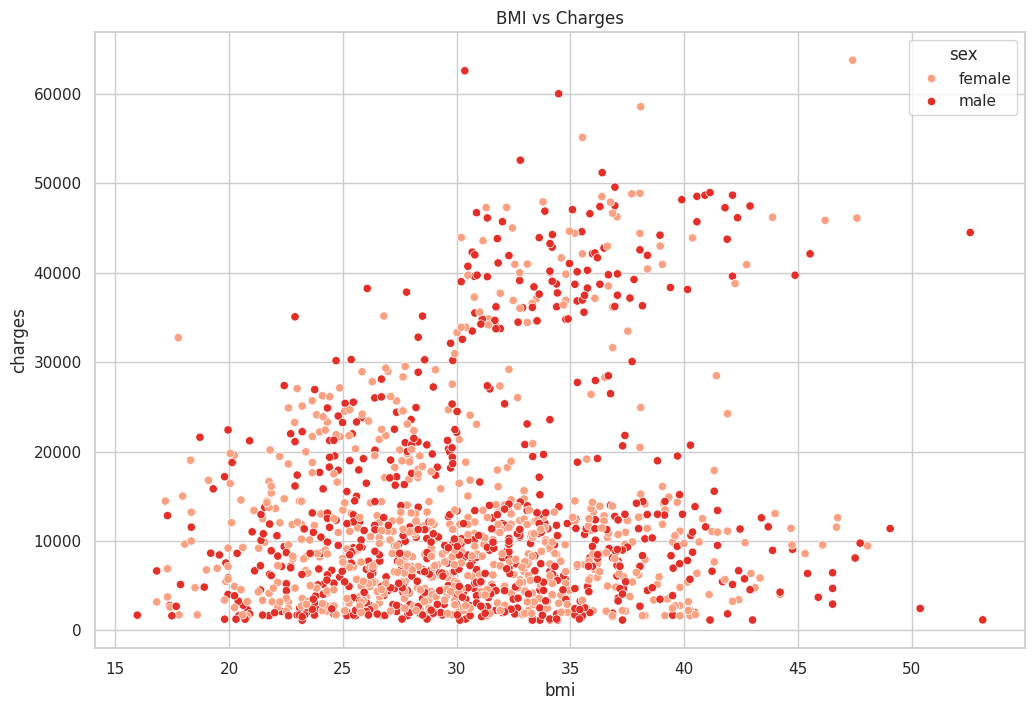

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'sex', data = df, palette = 'Reds')
plt.title('BMI vs Charges')

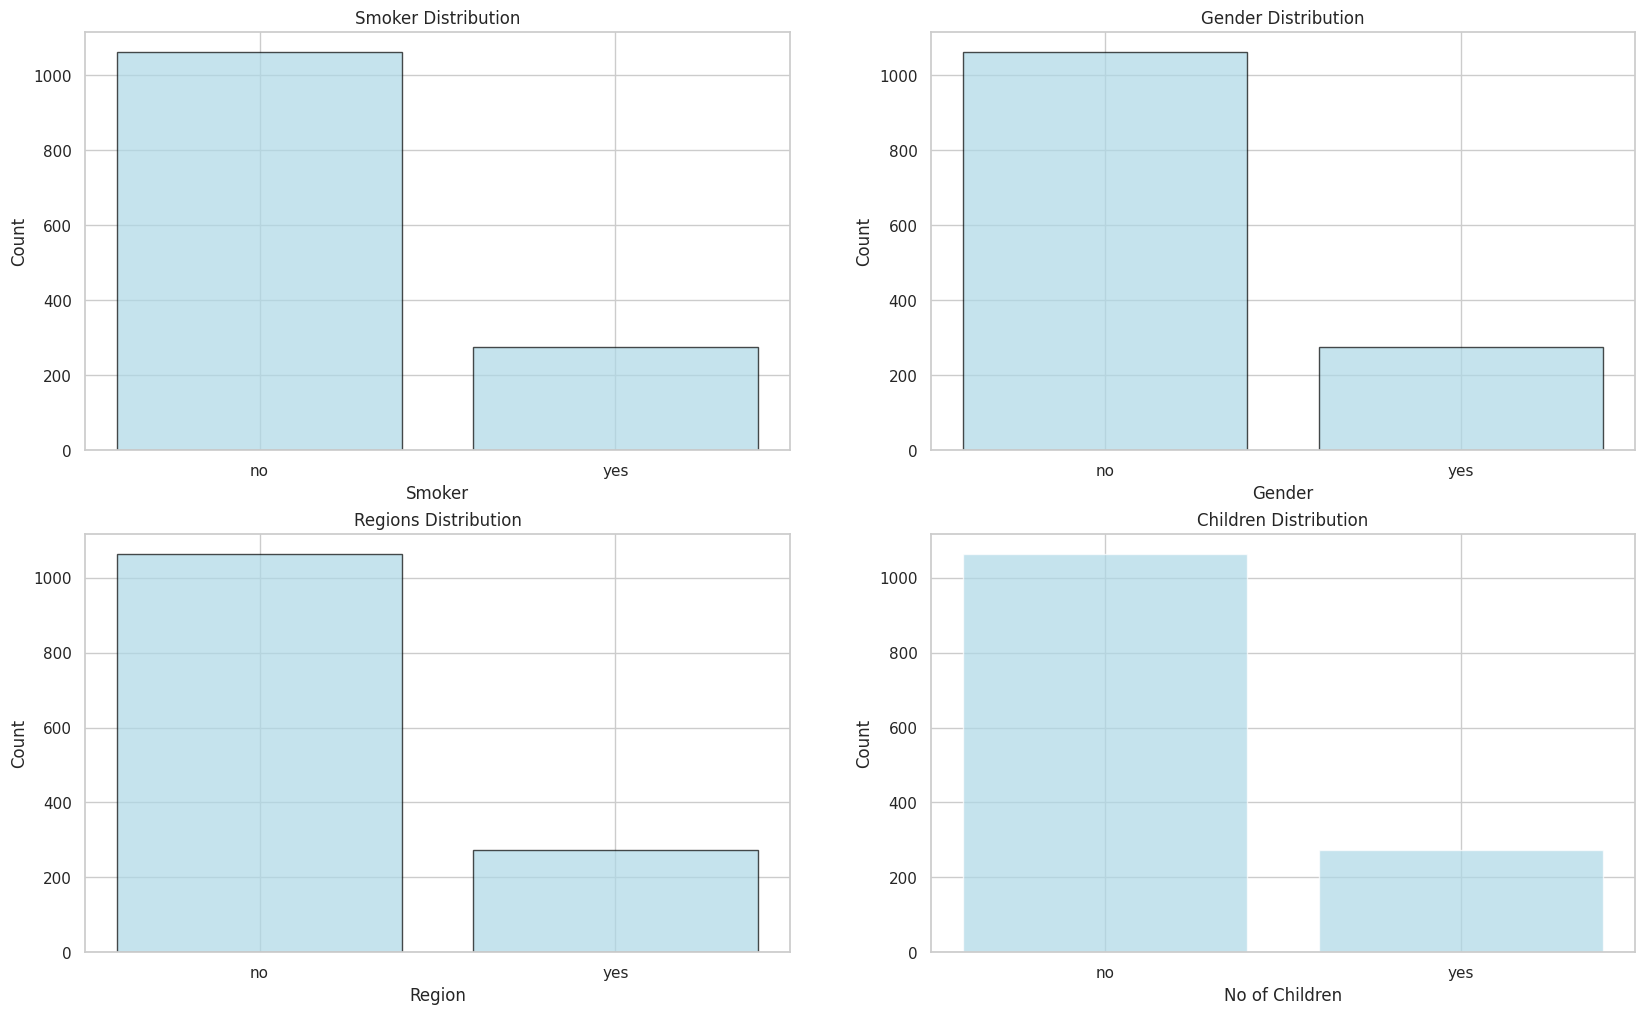

In [ ]:
plt.figure(figsize = (20,25))

x = df.smoker.value_counts().index #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]  #Count of each class on y-axis.

plt.subplot(4, 2, 1)
plt.bar(x, y,align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7) # Plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = df.sex.value_counts().index # Values for x- axis
y1 = [df['sex'].value_counts()[i] for i in x1] #Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x, y, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7) #Plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = df.region.value_counts().index #Values for x - axis
y2 = [df['region'].value_counts()[i] for i in x2] #Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x, y, align = 'center', color = 'lightblue', edgecolor = 'black', alpha = 0.7) # Plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Regions Distribution')

x3 = df.children.value_counts().index #Values for x-axis
y3 = [df['children'].value_counts()[i] for i in x3] #Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x, y, align = 'center', color = 'lightblue', alpha = 0.7) #Plot a bar plot
plt.xlabel('No of Children')
plt.ylabel('Count')
plt.title('Children Distribution')

plt.show()



###Bi-variate distribution of every possible attribute pair

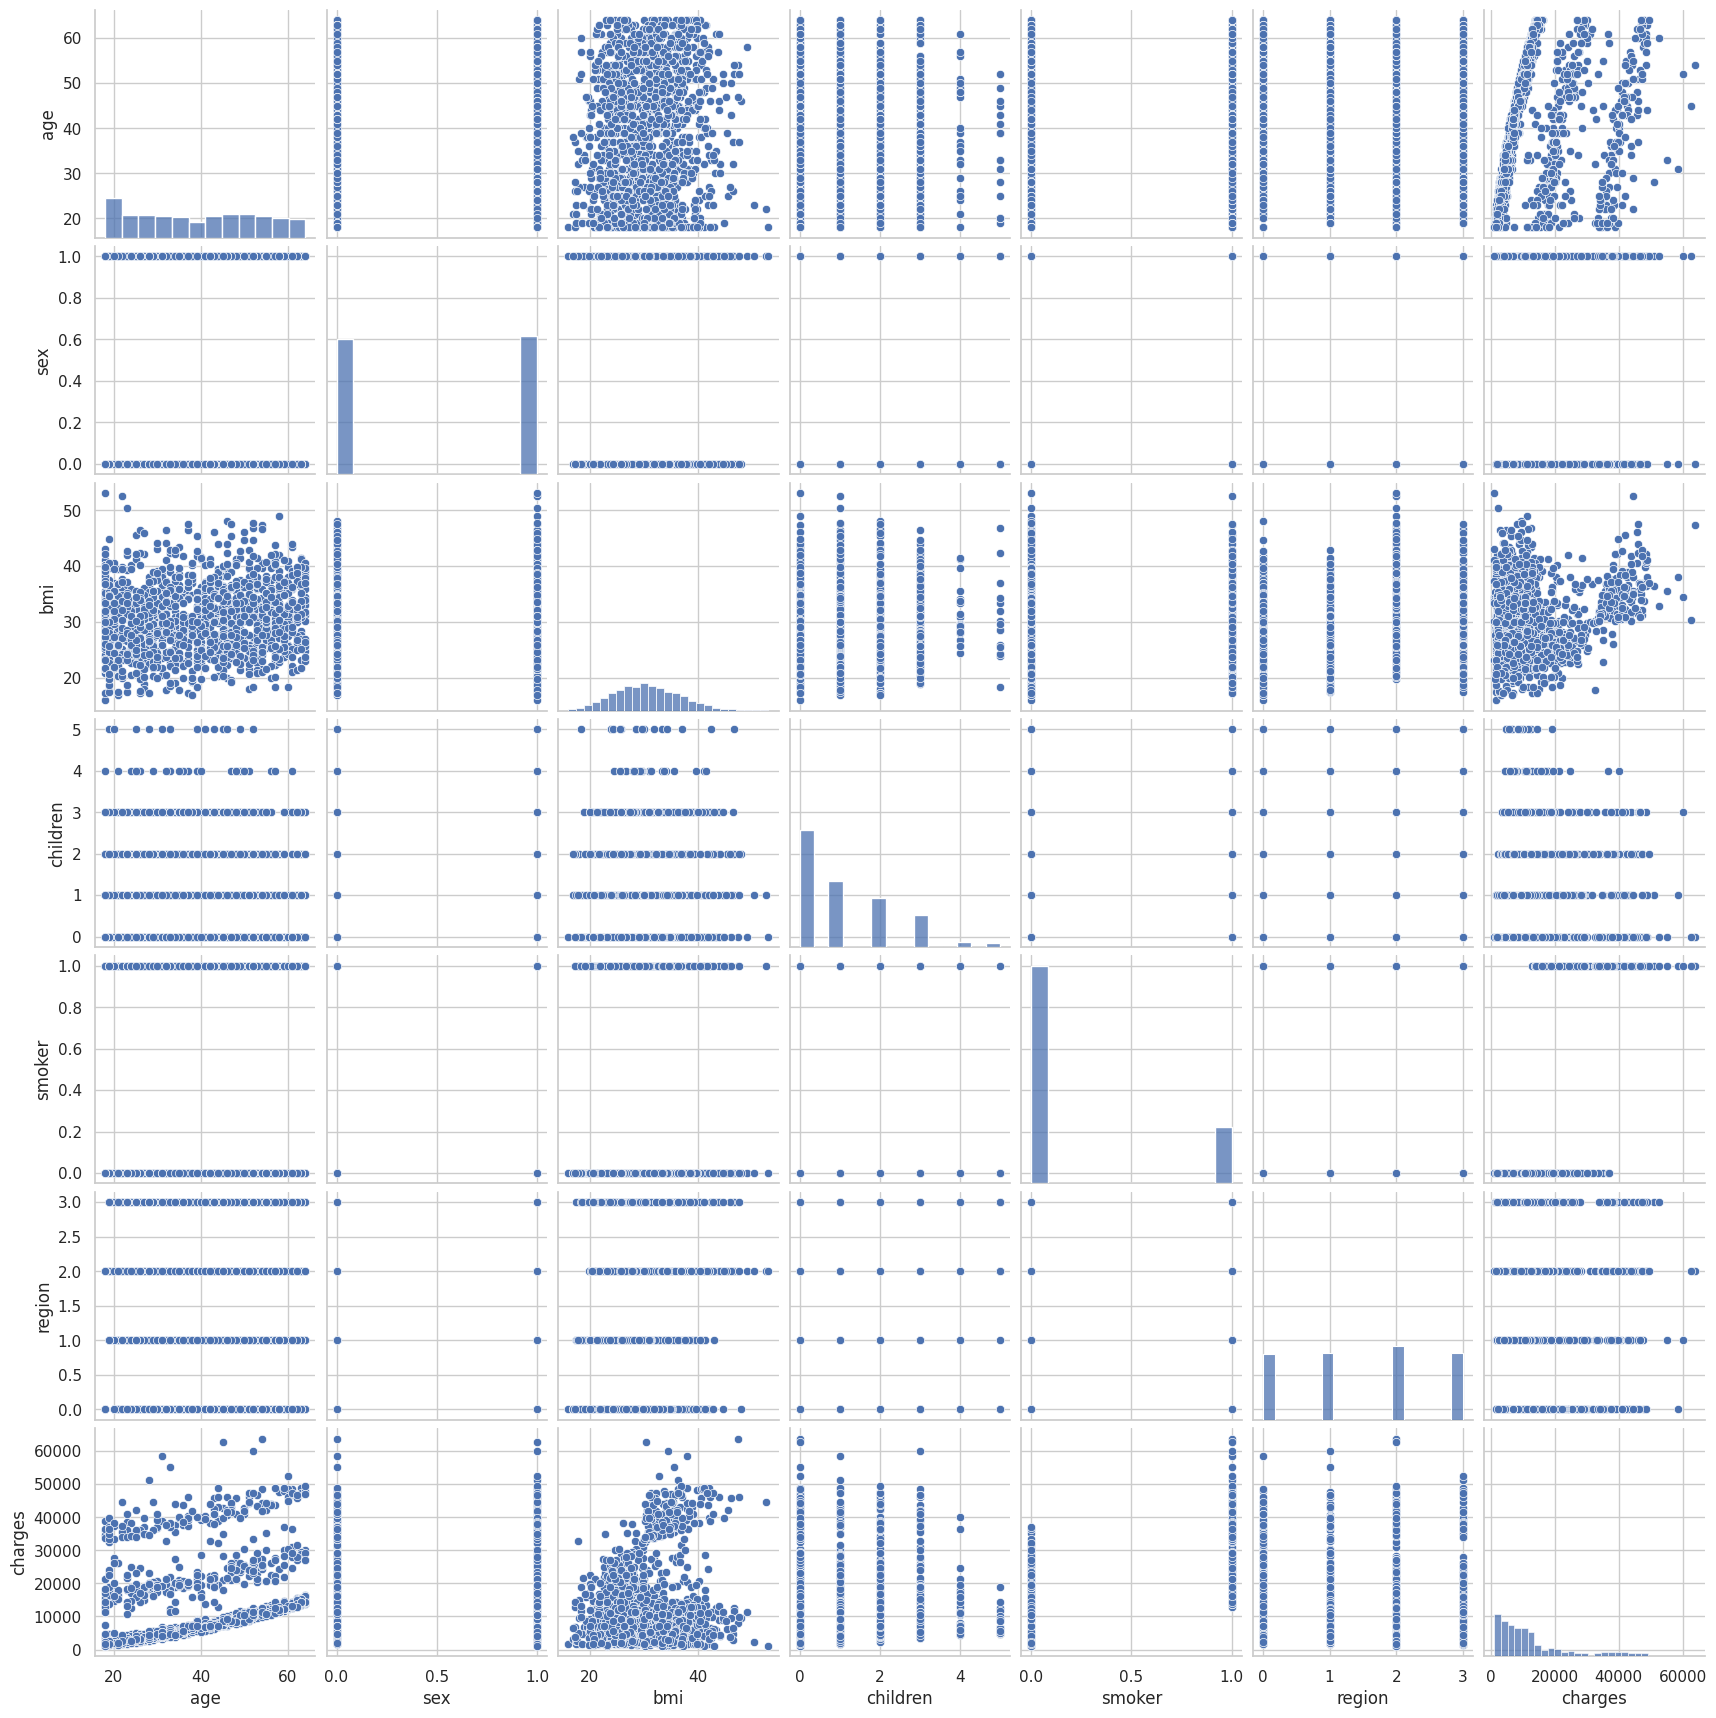

In [ ]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex','smoker','region']] = df_encoded.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)

sns.pairplot(df_encoded) #pairplot
plt.show()


###Smokers claimed more money than non smokers. Older people are charged more than younger ones.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


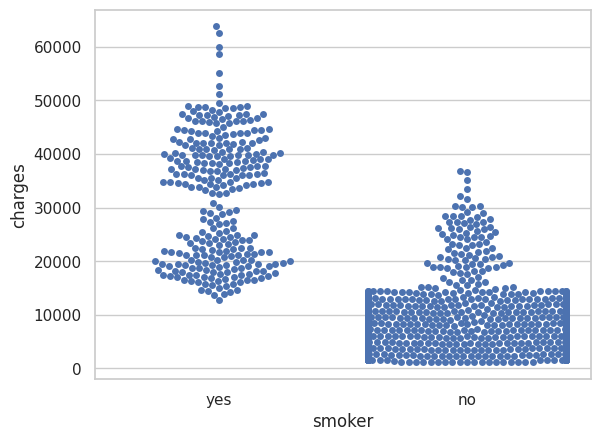

In [ ]:
sns.swarmplot(x = df['smoker'],
              y = df['charges'])
# A swarm plot is another way of plotting the distribution of an attribute or the joint distribution of a couple of attributes.

###On average non-smokers are charged less than smokers. The bank must charge more premium to smokers than to non-smokers. Moreover, older people must be charged more premium than those who are young.